SOM mit den skalierten Daten zu trainieren und mit codebook Vektoren in einem Plot als Linienzug anzeigen. y-Achse dabei 0-1 und x-Achse hat die Merkmale.

Das Ergebnis sind 9 Linienzüge in einem Plot wobei ein Linienzug die jeweilige Unit im Grid reflektiert.

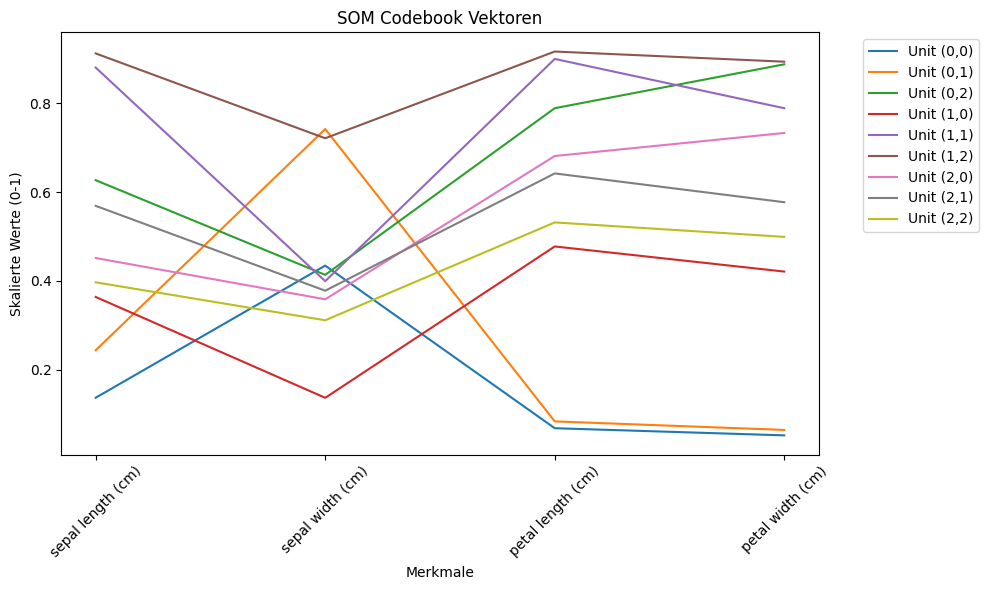

In [ ]:
# Load iris dataset
iris = datasets.load_iris()
# Create dataframe with features and target
rawdata = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=iris.feature_names + ['target'])
rawdata = rawdata.astype({'target':'int'}) # 0=setosa, 1=versicolor, 2=virginica
rawdata

# Drop target column because we want to predict the class
rawdata.drop(['target'], axis=1, inplace=True)
rawdata

scaler = MinMaxScaler(feature_range=(0,1))
scaleddata = pd.DataFrame(data=scaler.fit_transform(rawdata), columns=iris.feature_names)
scaleddata

som_data = rawdata.to_numpy()
# Initializing and training
som_shape = (3, 3) 
som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=som_data.shape[1], sigma=0.5, neighborhood_function='gaussian')
som.train(som_data, num_iteration=30000)

codebook = som.get_weights()
codebook.shape

# Plotting the Codebook Vectors
plt.figure(figsize=(10, 6))
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        plt.plot(range(scaleddata.shape[1]), codebook[i, j], label=f'Unit ({i},{j})')

# Achsenbeschriftungen und Titel
plt.xticks(range(len(scaleddata.columns)), scaleddata.columns, rotation=45)
plt.xlabel("Merkmale")
plt.ylabel("Skalierte Werte (0-1)")
plt.title("SOM Codebook Vektoren")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
